In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pycaret
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [2]:
import xgboost as xgb

xgb.__version__

'1.4.2'

In [3]:
pycaret.__version__

'2.3.3'

In [4]:
# read data
demo_all = pd.read_csv('data/data/demo_all.csv')
diet_all = pd.read_csv('data/data/diet_all.csv')
exam_all = pd.read_csv('data/data/exam_all.csv')
labs_all = pd.read_csv('data/data/labs_all.csv')
questionnaire_all = pd.read_csv('data/data/questionnaire_all.csv')
questionnaire_all_old = pd.read_csv('data/data/questionnaire_all_old.csv')

Text(0.5, 1.0, 'The number of each race')

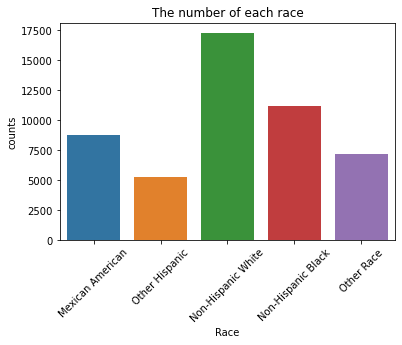

In [33]:
fig = sns.barplot(demo_all['RIDRETH1'].value_counts().index, 
            demo_all['RIDRETH1'].value_counts().values,
           )
fig.set_xticklabels(['Mexican American', 'Other Hispanic','Non-Hispanic White',
                        'Non-Hispanic Black','Other Race'],
                   rotation=45)
fig.set(xlabel='Race', ylabel= 'counts') 
fig.set(xlabel='Race', ylabel= 'counts') 
fig.set_title('The number of each race')

In [4]:
questionnaire_all = questionnaire_all[['SEQN','Target']]

#### feature importance from demo and Target

In [5]:
data1 = demo_all.merge(questionnaire_all, on='SEQN')

In [39]:
experiment = setup(data = data1, target = 'Target',
                   session_id=5636, fix_imbalance=True, 
                   categorical_imputation='mode',
                   numeric_imputation = 'mean',
                   feature_selection = True)
                                  

,Description,Value
0,session_id,5636
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(28722, 34)"
5,Missing Values,True
6,Numeric Features,14
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8936,0.8022,0.1317,0.4286,0.2015,0.1613,0.1941
1,0.8901,0.7924,0.0732,0.3261,0.1195,0.0853,0.1133
2,0.8881,0.7841,0.1171,0.3529,0.1758,0.1317,0.1552
3,0.8936,0.8031,0.1165,0.4286,0.1832,0.1458,0.1820
4,0.8802,0.7607,0.0777,0.2388,0.1172,0.0705,0.0835
5,0.9000,0.7907,0.1268,0.5417,0.2055,0.1736,0.2272
6,0.8896,0.7997,0.0976,0.3509,0.1527,0.1133,0.1405
7,0.8861,0.7948,0.0927,0.3065,0.1423,0.0997,0.1205
8,0.8856,0.8025,0.0634,0.2549,0.1016,0.0635,0.0815
9,0.8915,0.7967,0.0732,0.3488,0.1210,0.0887,0.1206


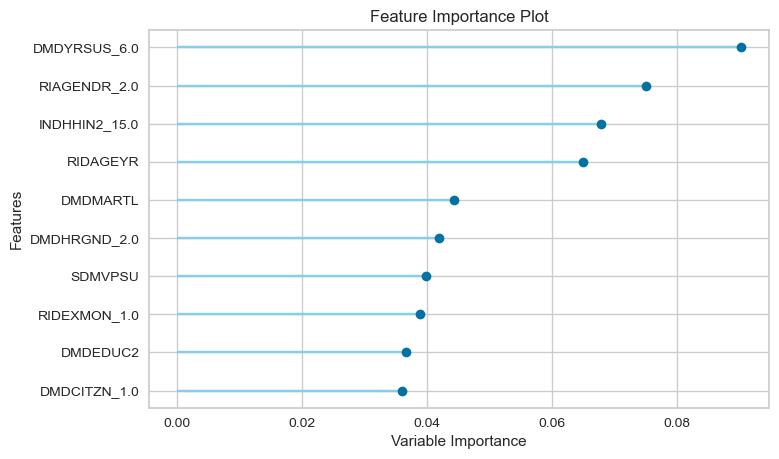

In [41]:
plot_model(xgb, plot = 'feature')

In [6]:
data1 = data1[['SEQN','DMDYRSUS','RIAGENDR','RIDAGEYR','INDHHIN2']]

#### feature importance from diet_all and Target

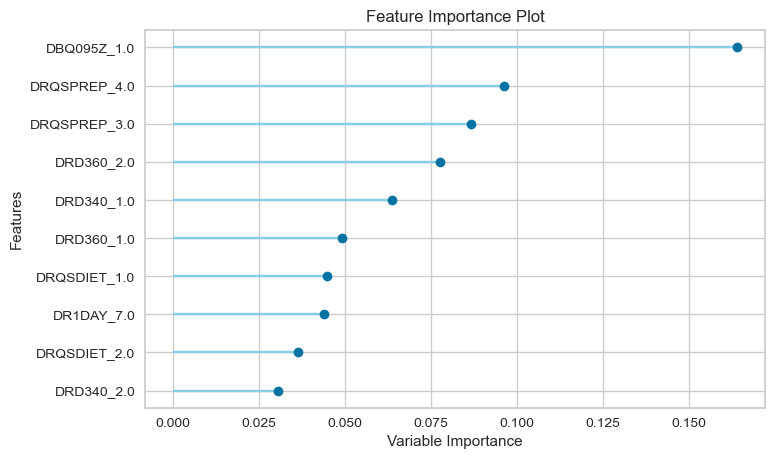

In [42]:
data2 = diet_all.merge(questionnaire_all, on='SEQN')

experiment2 = setup(data = data2, target = 'Target',
                   session_id=5636, fix_imbalance=True, 
                   categorical_imputation='mode',
                   numeric_imputation = 'mean',
                   feature_selection = True)
                                  

xgb = create_model('xgboost')

plot_model(xgb, plot = 'feature')

In [12]:
data2 = diet_all.merge(questionnaire_all, on='SEQN')

data2 = data2[['SEQN','DBQ095Z','DRQSPREP','DRD340','DRD360','DRQSDIET']]

#### feature importance from exam_all and Target

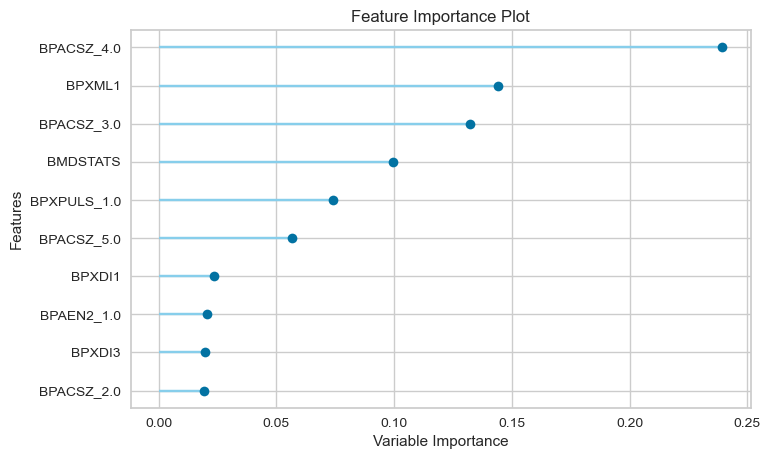

In [43]:
data3 = exam_all.merge(questionnaire_all, on='SEQN')

experiment3 = setup(data = data3, target = 'Target',
                   session_id=5636, fix_imbalance=True, 
                   categorical_imputation='mode',
                   numeric_imputation = 'mean',
                   feature_selection = True)
                                  

xgb = create_model('xgboost')

plot_model(xgb, plot = 'feature')

In [7]:
data3 = exam_all.merge(questionnaire_all, on='SEQN')

data3 = data3[['SEQN', 'BPACSZ','BPXML1','BMDSTATS','BPXPULS']]

#### feature importance from labs_all and questionnaire_all

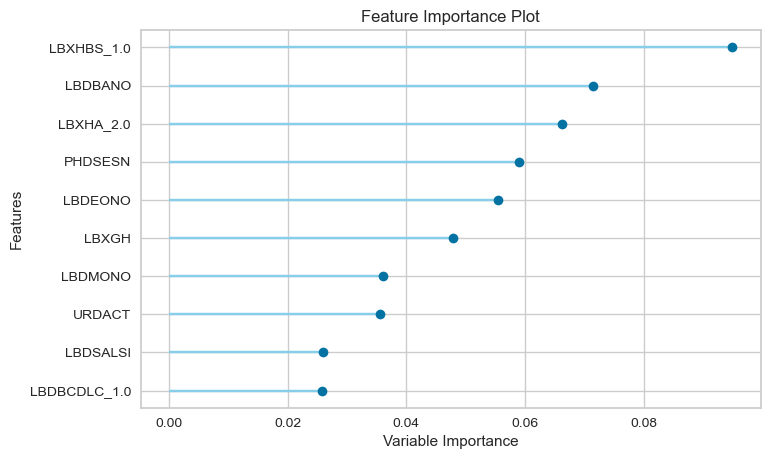

In [44]:
data4 = labs_all.merge(questionnaire_all, on='SEQN')

experiment4 = setup(data = data4, target = 'Target',
                   session_id=5636, fix_imbalance=True, 
                   categorical_imputation='mode',
                   numeric_imputation = 'mean',
                   feature_selection = True)
                                  

xgb = create_model('xgboost')

plot_model(xgb, plot = 'feature')

In [51]:
labs_all.merge(questionnaire_all, on='SEQN').columns

Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'LBXSAL',
       'LBDSALSI', 'LBXSATSI', 'LBXSASSI',
       ...
       'LBDVOXLC', 'LBXVTC', 'LBDVTCLC', 'LBXVTE', 'LBDVTELC', 'LBXVTP',
       'LBDVTPLC', 'LBXVXY', 'LBDVXYLC', 'Target'],
      dtype='object', length=173)

In [8]:
data4 = labs_all.merge(questionnaire_all, on='SEQN')

data4 = data4[['SEQN','LBXHA','LBXHBS','LBDMONO','LBDBANO','LBXGH','Target']]

#### feature importance from ques_all and questionnaire_all

In [9]:
data5 = questionnaire_all_old


<AxesSubplot:>

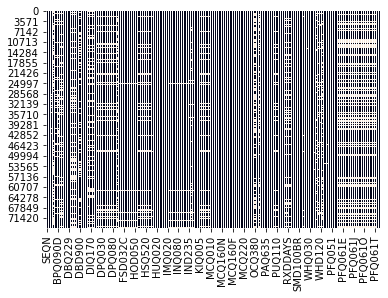

In [17]:
sns.heatmap(data5.isnull(), cbar=False)

In [33]:
data5 = data5.drop(data5.isnull().sum()[data5.isnull().sum() > 4000].index,axis=1)

In [34]:
data5 = data5.drop(['MCQ160F','MCQ160C', 'MCQ160B','MCQ160E'],axis=1)

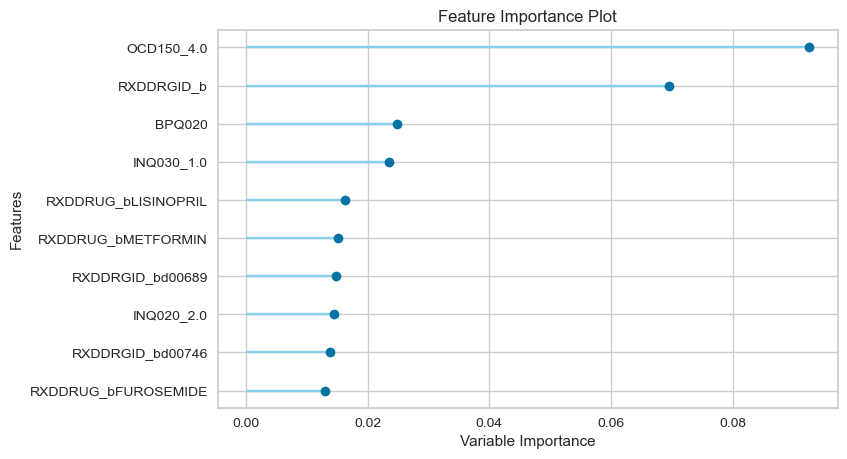

In [62]:
experiment5 = setup(data = data5, target = 'Target',
                   session_id=5636, fix_imbalance=True, 
                   categorical_imputation='mode',
                   numeric_imputation = 'mean',
                   feature_selection = True)
                        

xgb = create_model('xgboost')

plot_model(xgb, plot = 'feature')

In [10]:
data5 = data5[['SEQN','OCD150','RXDDRGID']]

#### merge the dataset

In [13]:
df = data1.merge(data2, on='SEQN')
df = df.merge(data3, on='SEQN')
df = df.merge(data4, on='SEQN')
df = df.merge(data5, on='SEQN')

In [14]:
df.shape

(72191, 22)

In [16]:
df = df.drop('SEQN',axis=1)

#### check the missing values of new dataset

In [18]:
df['OCD150'] = df['OCD150'].replace({7:np.nan,9:np.nan})

Text(33.0, 0.5, 'Counts')

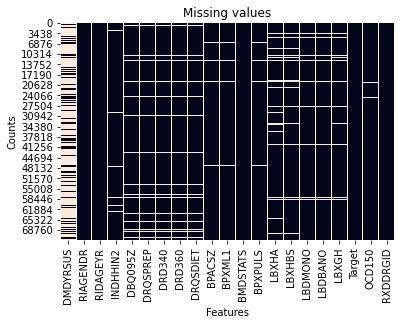

In [19]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values')
plt.xlabel('Features')
plt.ylabel('Counts')

In [20]:
df.columns

Index(['DMDYRSUS', 'RIAGENDR', 'RIDAGEYR', 'INDHHIN2', 'DBQ095Z', 'DRQSPREP',
       'DRD340', 'DRD360', 'DRQSDIET', 'BPACSZ', 'BPXML1', 'BMDSTATS',
       'BPXPULS', 'LBXHA', 'LBXHBS', 'LBDMONO', 'LBDBANO', 'LBXGH', 'Target',
       'OCD150', 'RXDDRGID'],
      dtype='object')

#### drop "DMDYRSUS" because it has so many missing values

In [21]:
df = df.drop('DMDYRSUS',axis=1)

#### drop all missing values

In [23]:
df = df.dropna()

In [24]:
df.shape

(59214, 20)

In [22]:
df.columns

Index(['RIAGENDR', 'RIDAGEYR', 'INDHHIN2', 'DBQ095Z', 'DRQSPREP', 'DRD340',
       'DRD360', 'DRQSDIET', 'DR1DAY', 'DR1TSODI', 'BPACSZ', 'BPXML1',
       'BMDSTATS', 'BPXPULS', 'LBXHA', 'LBXHBS', 'LBDMONO', 'LBDBANO', 'LBXGH',
       'Target', 'OCD150', 'RXDDRGID', 'BPQ020'],
      dtype='object')

#### split the data

In [26]:
df.to_csv('try_data/final_data.csv', index=False)

In [27]:
df = pd.read_csv('try_data/final_data.csv')

In [28]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0, stratify=df["Target"])